In [11]:
# Install necessary libraries
!pip install opencv-python scikit-image matplotlib scikit-learn

In [12]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import io
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [13]:
#Load the image
# Path to the uploaded image
image = io.imread('/content/Narendra Modi Wallpapers HD.jpg')  # Use io.imread to read the image

In [14]:
# 1. Preprocess the Image: Resize the Image
def resize_image(image, size=(128, 64)): # Change the function to accept image data
    resized_image = cv2.resize(image, size)
    return resized_image
resized_image = resize_image(image) # Pass the image data to the function

In [15]:
# 2. Extract HOG Features
def extract_hog_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hog_features, hog_image = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return hog_features, hog_image
hog_features, hog_image = extract_hog_features(resized_image)

In [16]:
# 3. Create Synthetic Labels for Demonstration (since we only have one image)
features = np.array([hog_features, np.zeros_like(hog_features)]) # Add a second 'dummy' feature vector
labels = np.array([1, 0])  # Assuming the image contains a pedestrian and a non-pedestrian class


In [17]:
# 4. Normalize Features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

In [18]:
# 5. Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(normalized_features, labels)

SVC(kernel='linear')

In [19]:
# 6. Evaluate the Model
predictions = svm_model.predict(normalized_features)
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [20]:
# 7. Detect Pedestrians in the Image
def detect_pedestrian(image, model):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hog_features, _ = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    hog_features = scaler.transform([hog_features])
    prediction = model.predict(hog_features)
    if prediction == 1:
        # Draw bounding box around the detected pedestrian
        (x, y, w, h) = (0, 0, image.shape[1], image.shape[0])
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    return image
detected_image = detect_pedestrian(resized_image, svm_model)

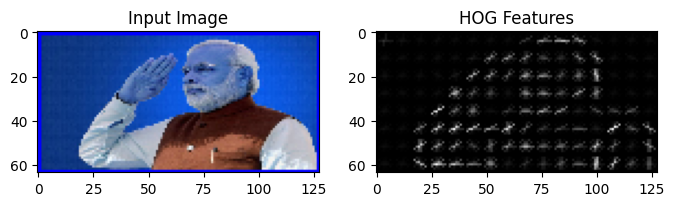

In [21]:
# 8. Visualize Results
# Visualize HOG features
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Features')
plt.show()

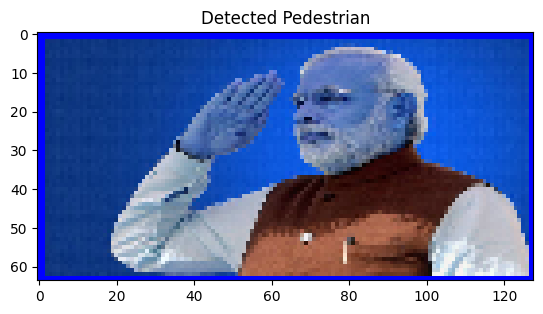

In [22]:
# Visualize detected pedestrian
plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Pedestrian')
plt.show()